# Importing Packages

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline

# Reading Data

In [2]:
df = pd.read_csv('red-wine.csv')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [8]:
df.isnull()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,False,False,False,False,False,False,False,False,False,False,False,False
1595,False,False,False,False,False,False,False,False,False,False,False,False
1596,False,False,False,False,False,False,False,False,False,False,False,False
1597,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
df.sum()

fixed acidity           13303.10000
volatile acidity          843.98500
citric acid               433.29000
residual sugar           4059.55000
chlorides                 139.85900
free sulfur dioxide     25384.00000
total sulfur dioxide    74302.00000
density                  1593.79794
pH                       5294.47000
sulphates                1052.38000
alcohol                 16666.35000
quality                  9012.00000
dtype: float64

In [10]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [11]:
df.size

19188

In [12]:
df.shape

(1599, 12)

In [13]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [14]:
Q1 = df.quantile(0.25)
Q2 = df.quantile(0.50)
Q3 = df.quantile(0.75)
Q4 = df.quantile(1)

In [15]:
Q1

fixed acidity            7.1000
volatile acidity         0.3900
citric acid              0.0900
residual sugar           1.9000
chlorides                0.0700
free sulfur dioxide      7.0000
total sulfur dioxide    22.0000
density                  0.9956
pH                       3.2100
sulphates                0.5500
alcohol                  9.5000
quality                  5.0000
Name: 0.25, dtype: float64

In [16]:
Q2

fixed acidity            7.90000
volatile acidity         0.52000
citric acid              0.26000
residual sugar           2.20000
chlorides                0.07900
free sulfur dioxide     14.00000
total sulfur dioxide    38.00000
density                  0.99675
pH                       3.31000
sulphates                0.62000
alcohol                 10.20000
quality                  6.00000
Name: 0.5, dtype: float64

In [17]:
Q3

fixed acidity            9.200000
volatile acidity         0.640000
citric acid              0.420000
residual sugar           2.600000
chlorides                0.090000
free sulfur dioxide     21.000000
total sulfur dioxide    62.000000
density                  0.997835
pH                       3.400000
sulphates                0.730000
alcohol                 11.100000
quality                  6.000000
Name: 0.75, dtype: float64

In [18]:
Q4

fixed acidity            15.90000
volatile acidity          1.58000
citric acid               1.00000
residual sugar           15.50000
chlorides                 0.61100
free sulfur dioxide      72.00000
total sulfur dioxide    289.00000
density                   1.00369
pH                        4.01000
sulphates                 2.00000
alcohol                  14.90000
quality                   8.00000
Name: 1.0, dtype: float64

In [19]:
df['alcohol'].min()

8.4

In [20]:
df['alcohol'].max()

14.9

# Plots

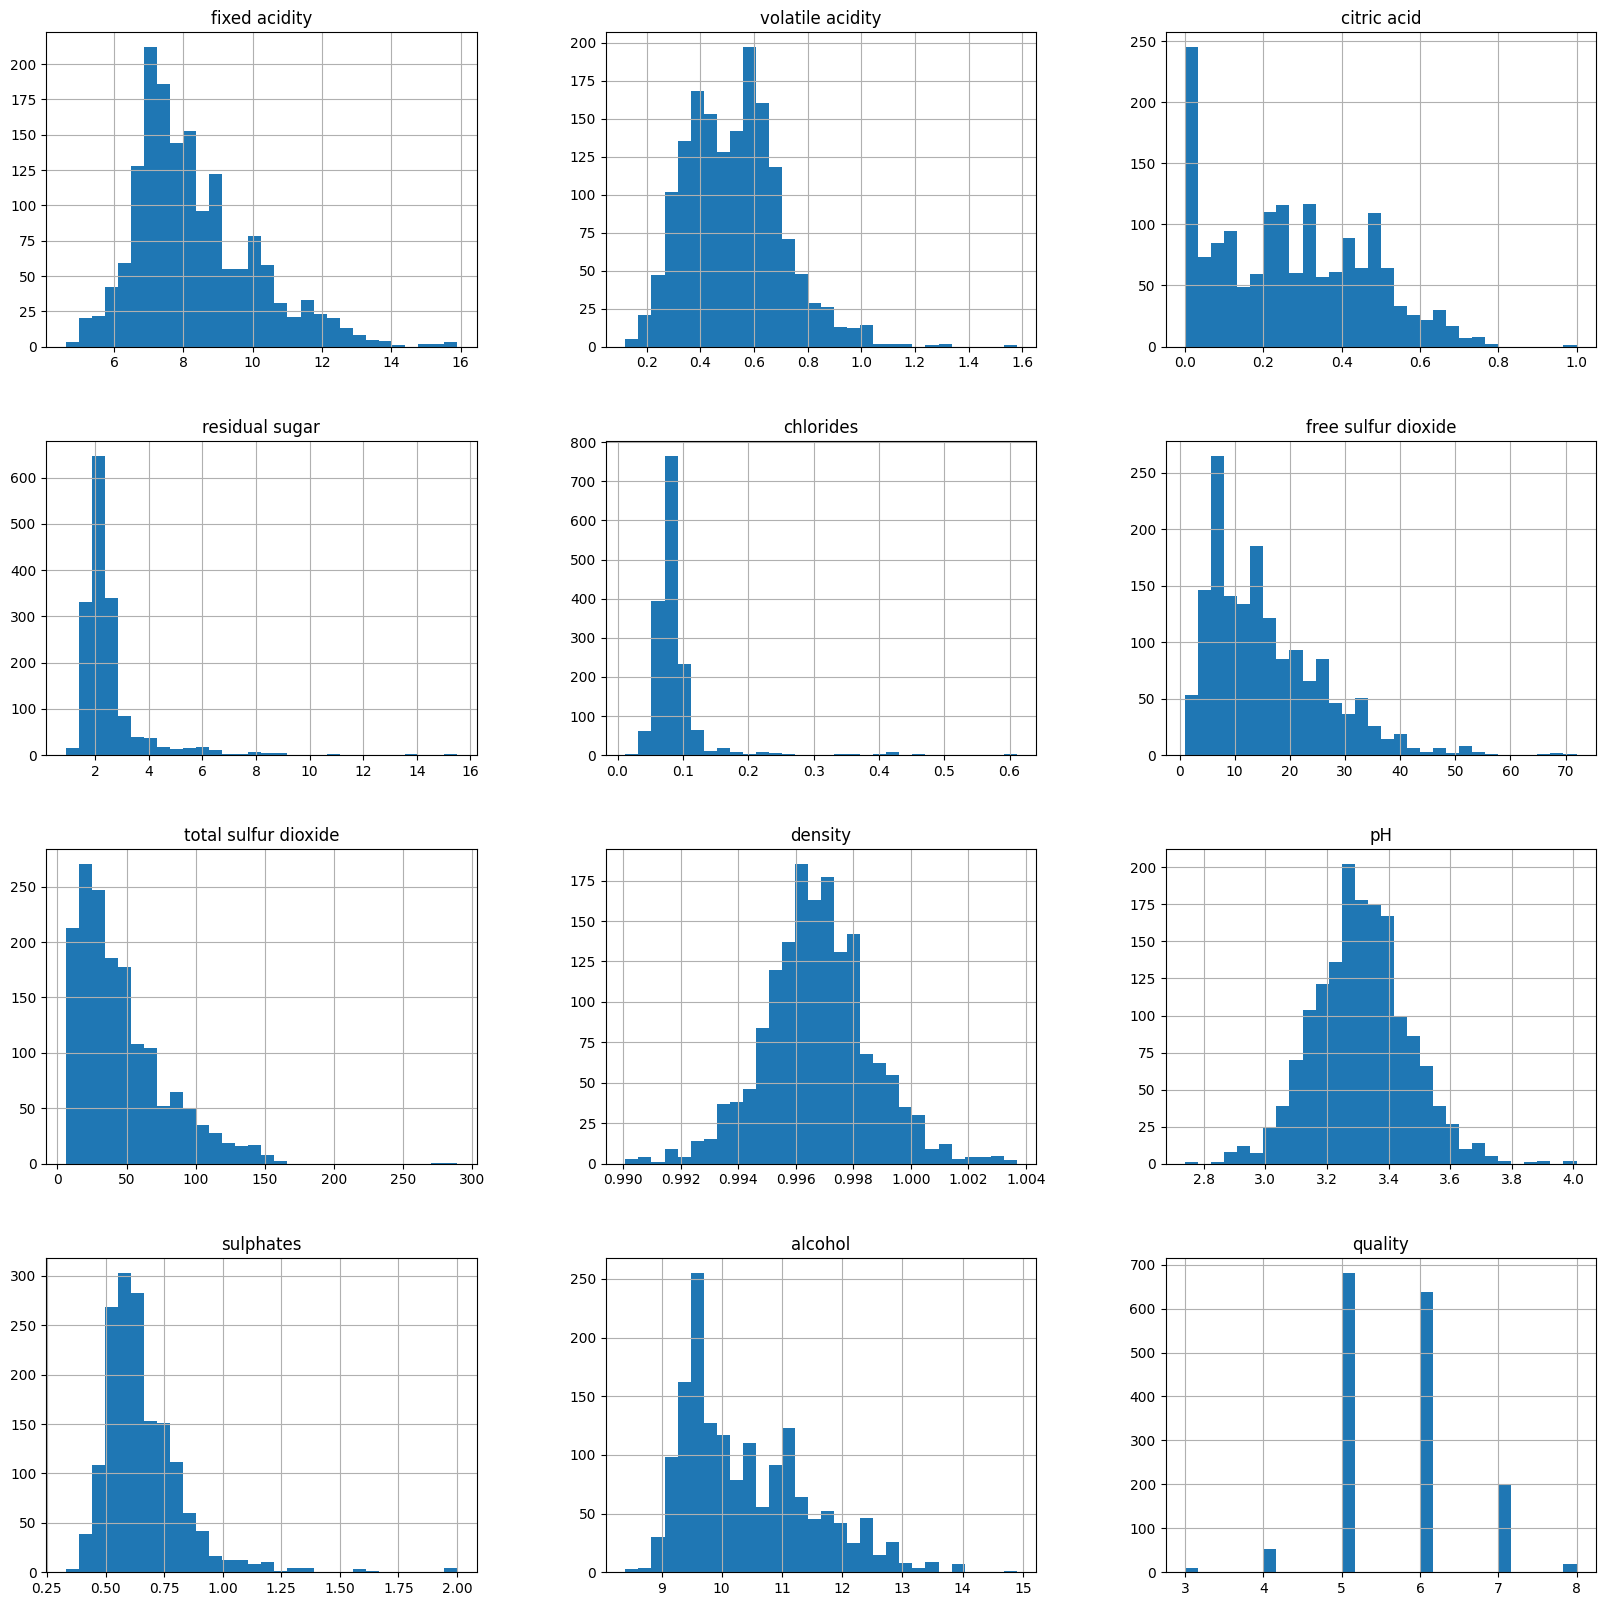

In [21]:
df.hist(bins=30, figsize=(20,20))
plt.show()

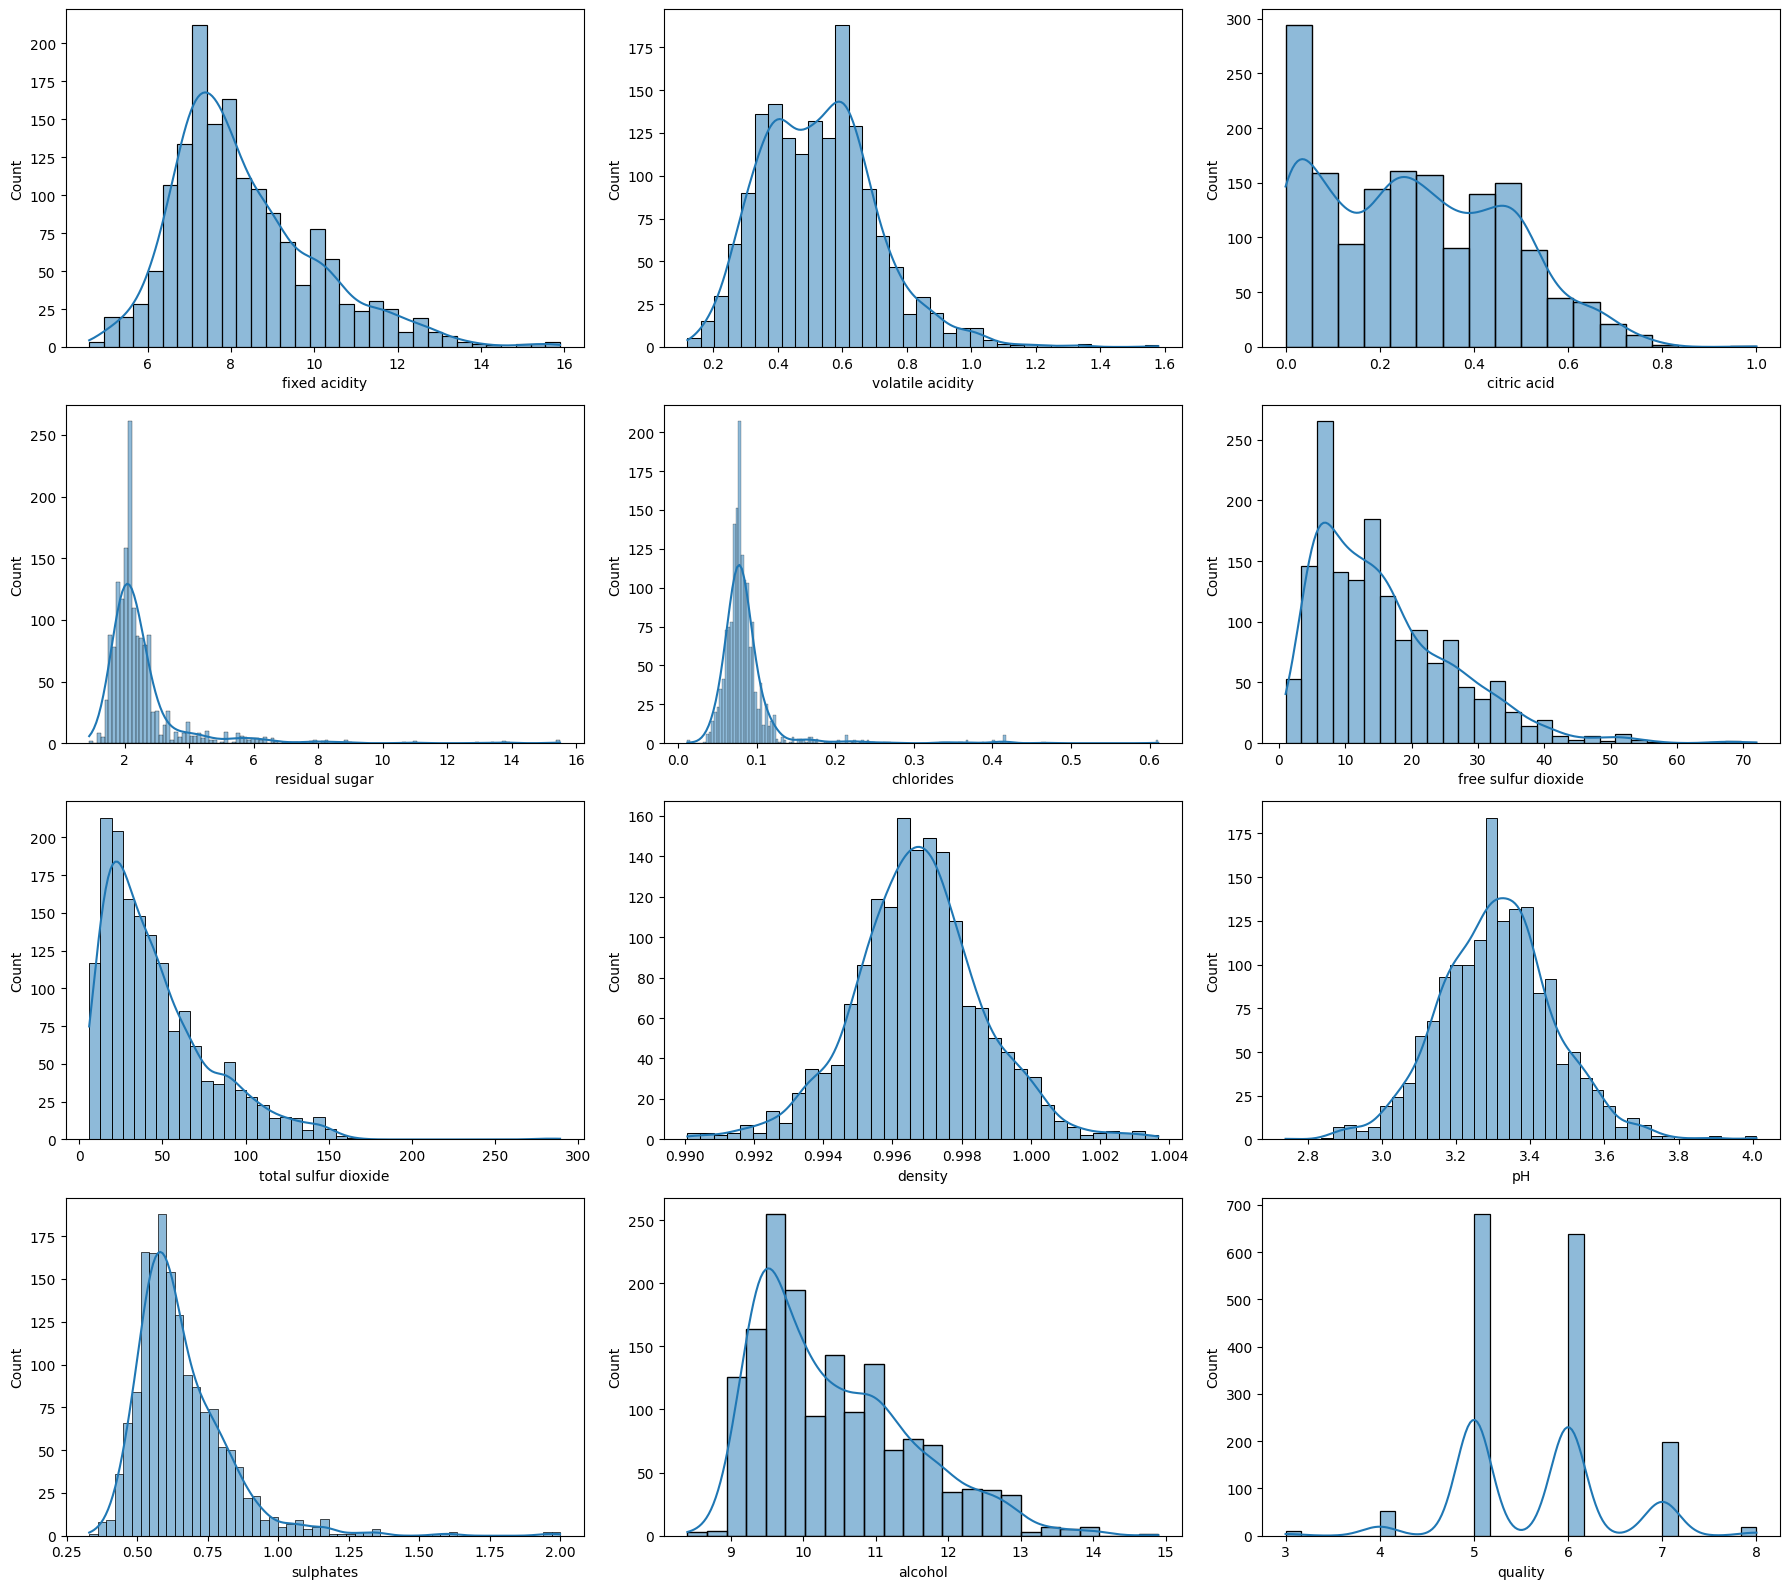

In [22]:
fig, axes = plt.subplots(4, 3, figsize=(18, 16))
axes = axes.flatten()
for i, column in enumerate(df.columns[:12]):
    sns.histplot(df[column], kde=True, ax=axes[i])
plt.tight_layout()
plt.show()

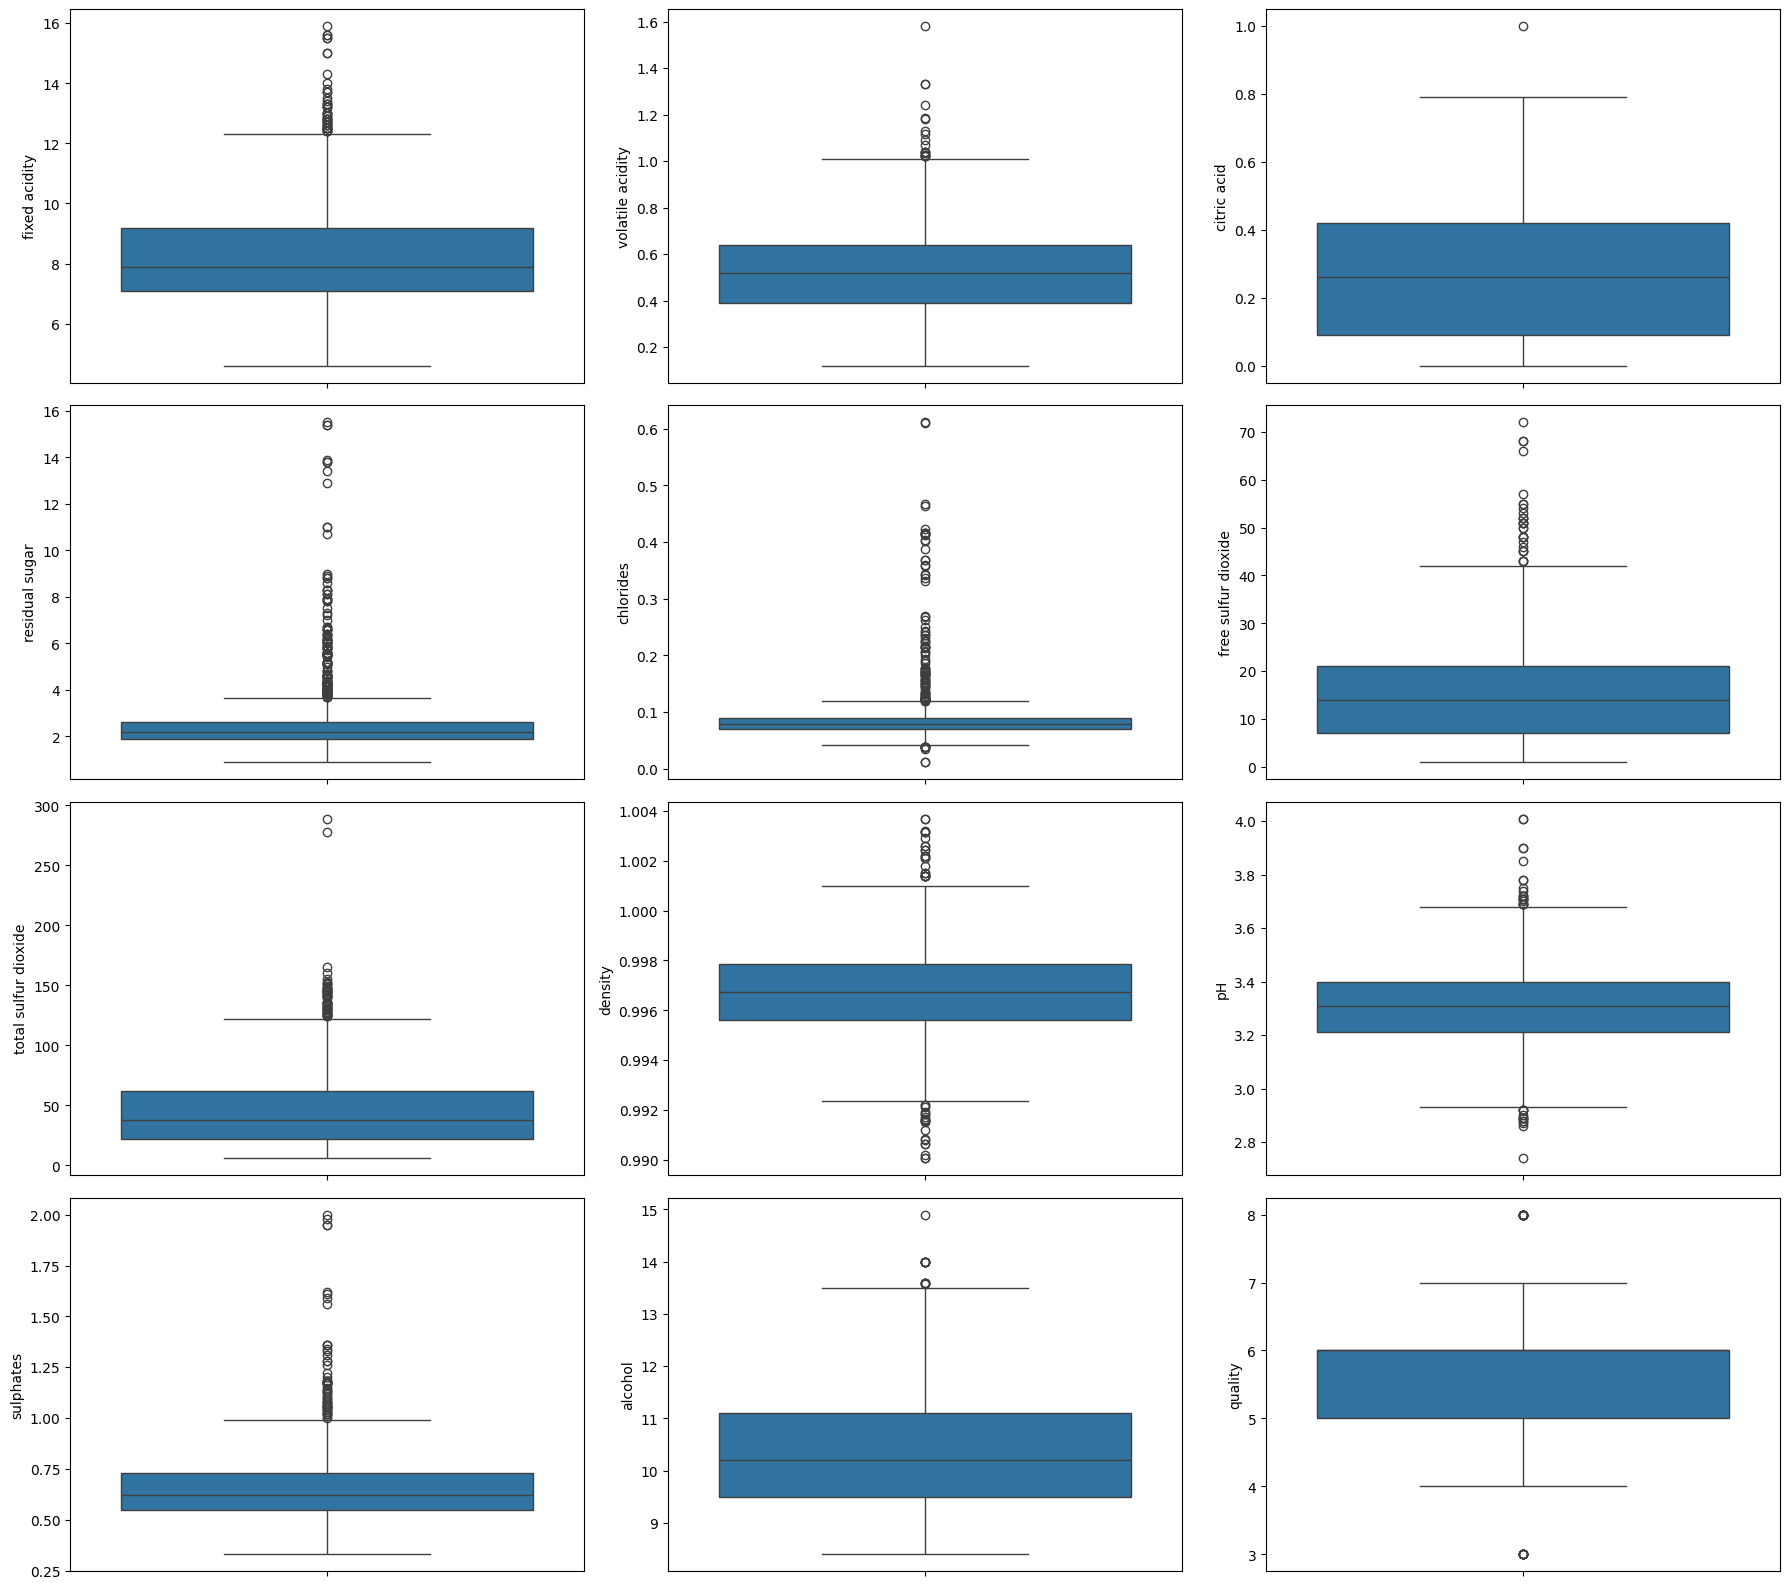

In [23]:
fig, axes = plt.subplots(4, 3, figsize=(18, 16))
axes = axes.flatten()
for i, column in enumerate(df.columns[:12]):
    sns.boxplot(df[column],ax=axes[i])
plt.tight_layout()
plt.show()

# Correlation Matrix

In [24]:
correlation_matrix = df.corr()

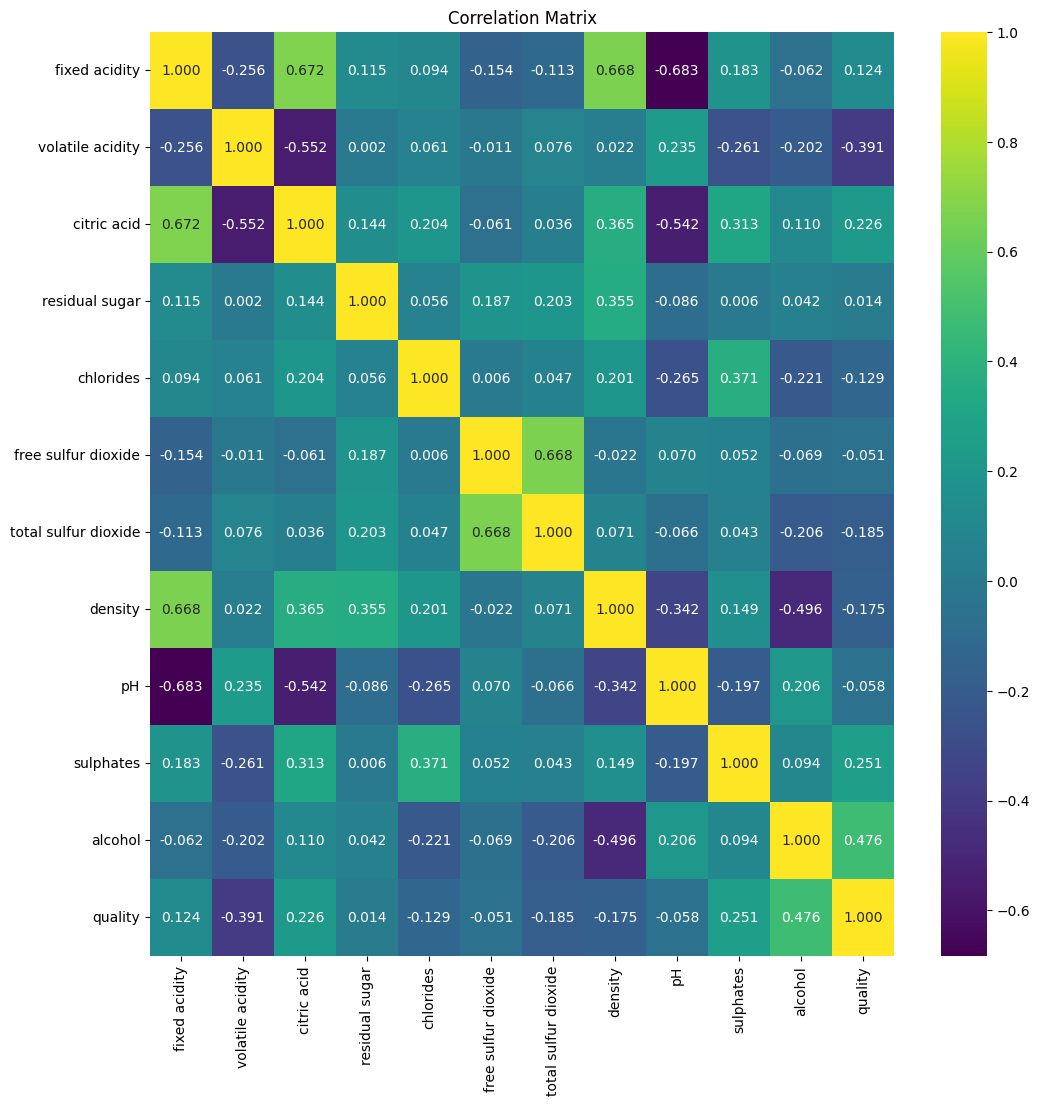

In [25]:
plt.figure(figsize=(12, 12))  # Adjust the size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".3f")
plt.title('Correlation Matrix')
plt.show()

# Principal Component Analysis

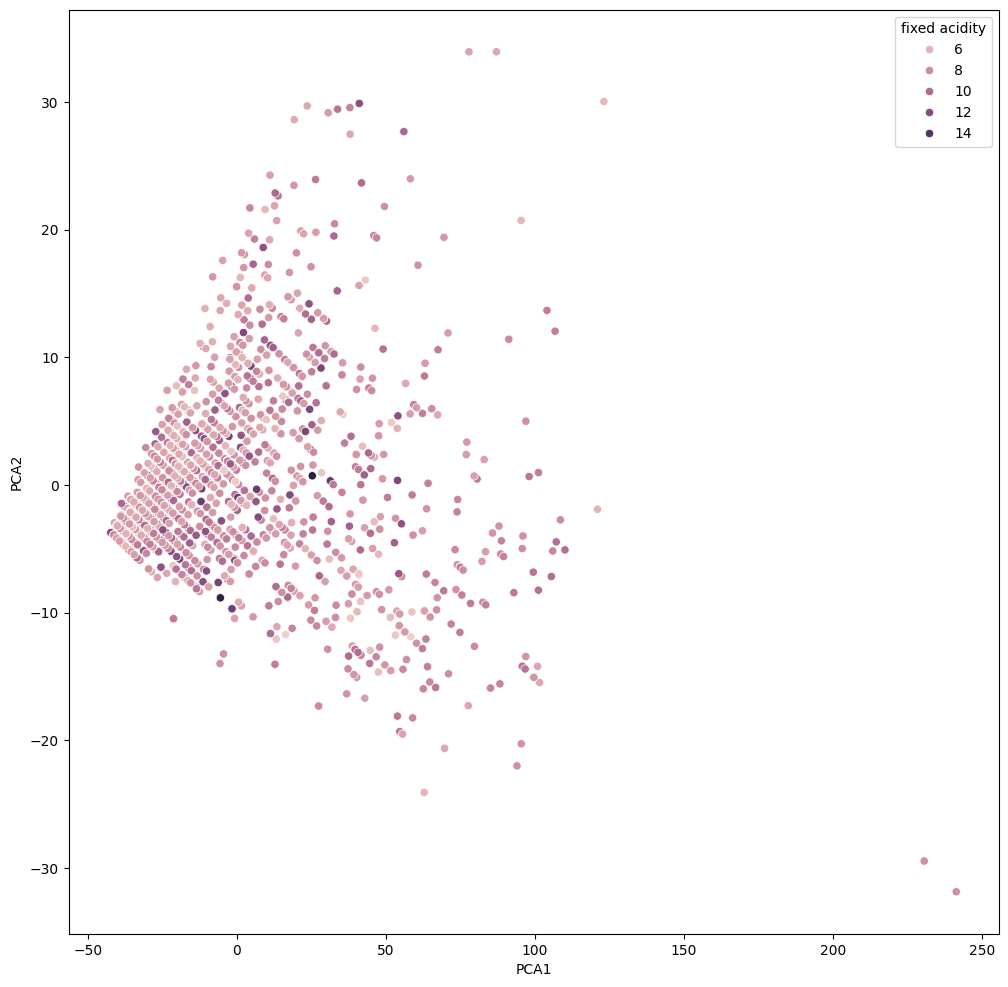

In [26]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df.drop('fixed acidity', axis=1))
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(12,12))
sns.scatterplot(x='PCA1', y='PCA2', hue='fixed acidity', data=df)
plt.show()

# Red Wine Quality Check based on other components

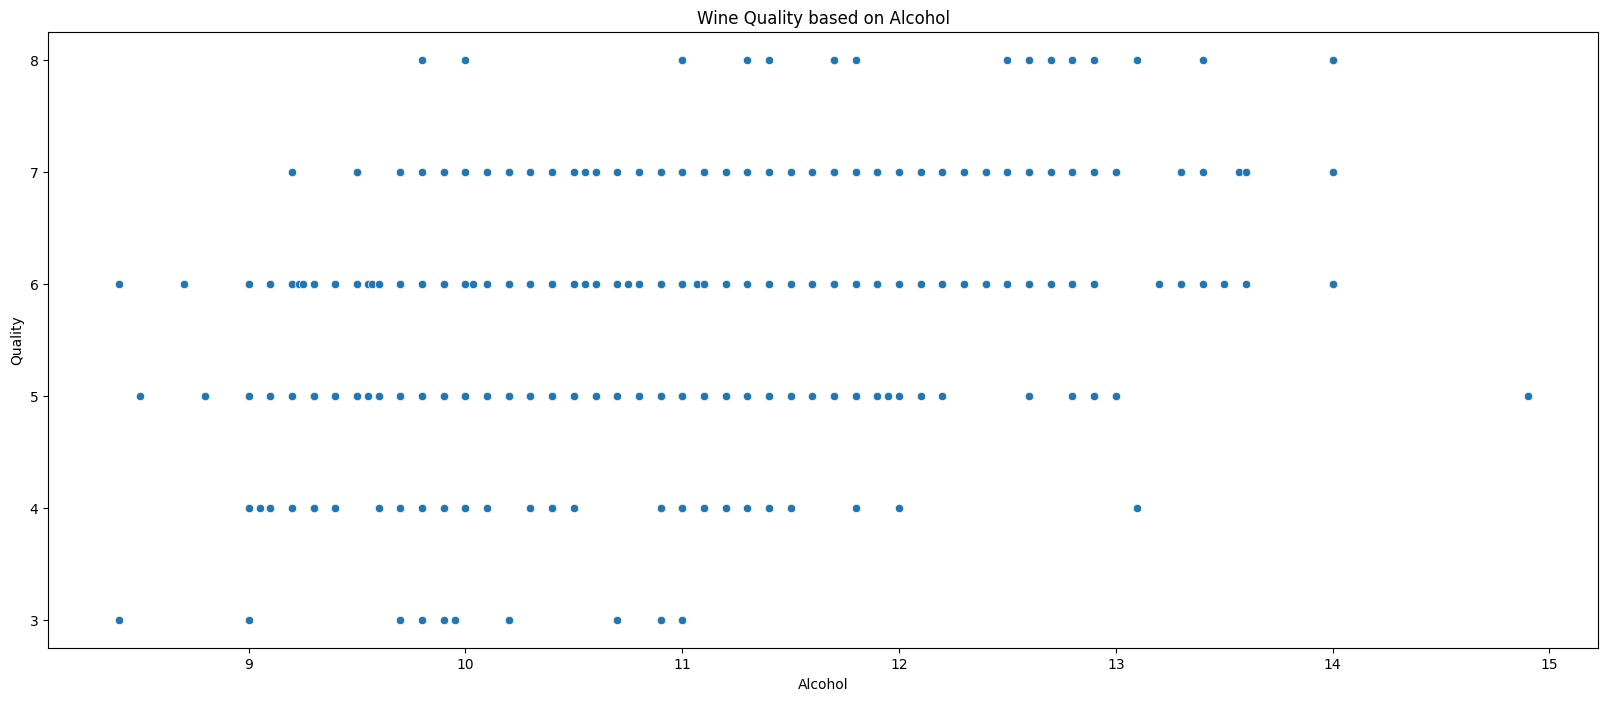

In [27]:
plt.figure(figsize=(20,8))
sns.scatterplot(x = 'alcohol',y = 'quality', data=df)
plt.title('Wine Quality based on Alcohol')
plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.show()

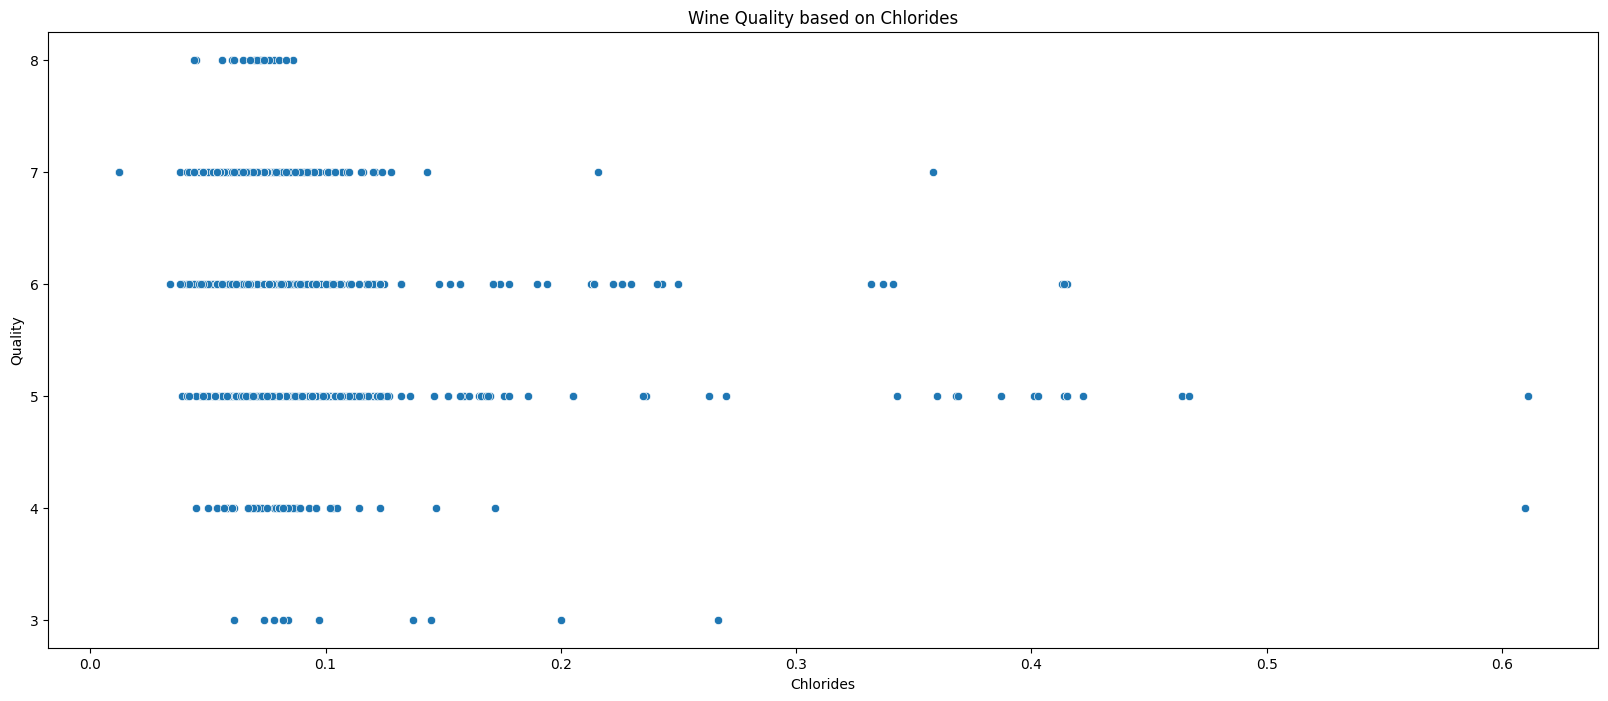

In [28]:
plt.figure(figsize=(20,8))
sns.scatterplot(x = 'chlorides',y = 'quality', data=df)
plt.title('Wine Quality based on Chlorides')
plt.xlabel('Chlorides')
plt.ylabel('Quality')
plt.show()

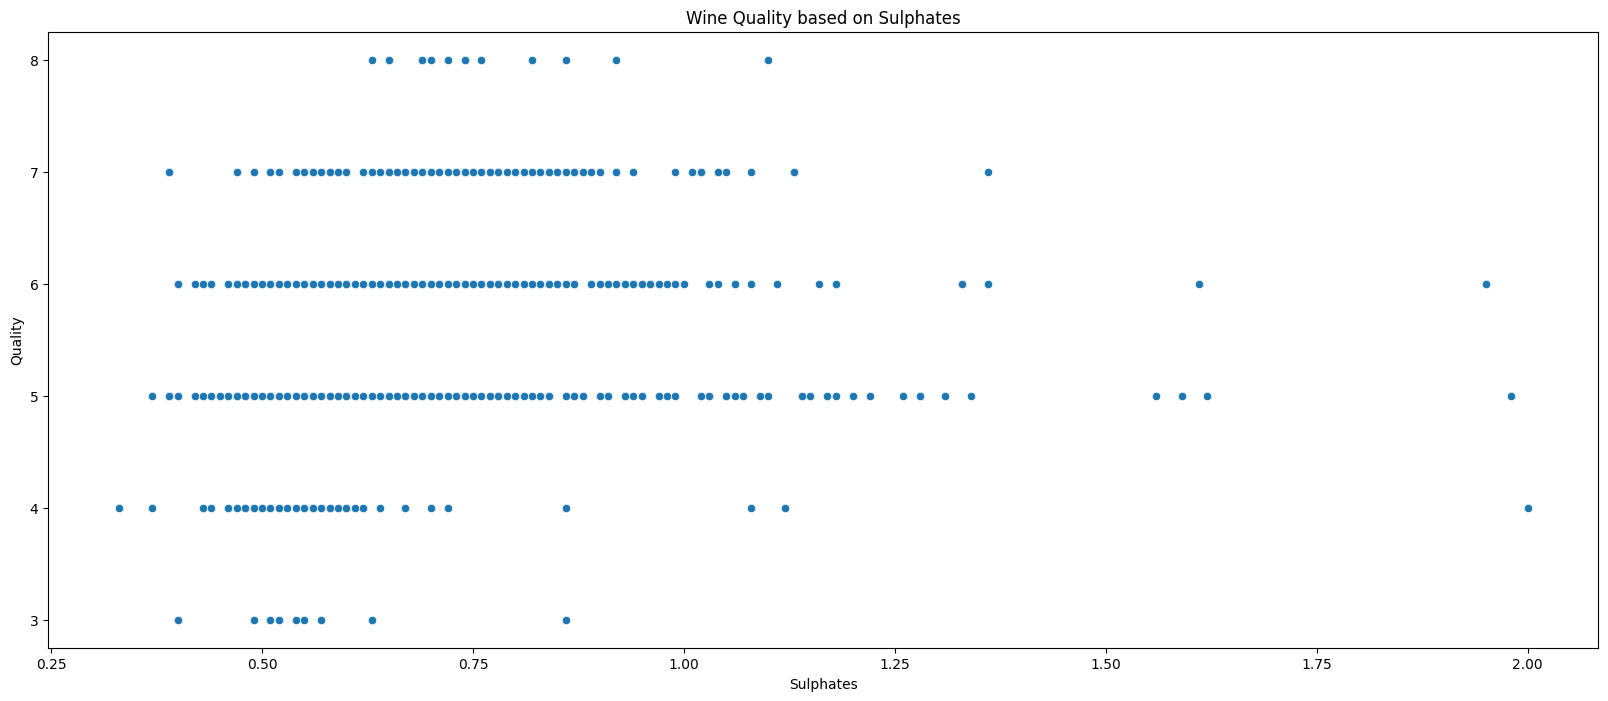

In [29]:
plt.figure(figsize=(20,8))
sns.scatterplot(x = 'sulphates',y = 'quality', data=df)
plt.title('Wine Quality based on Sulphates')
plt.xlabel('Sulphates')
plt.ylabel('Quality')
plt.show()

# Outlier Detection

In [30]:
outlier = df[df['alcohol']>=14.5]

In [31]:
print(outlier)

     fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
652           15.9              0.36         0.65             7.5      0.096   

     free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
652                 22.0                  71.0   0.9976  2.98       0.84   

     alcohol  quality       PCA1      PCA2  
652     14.9        5  25.293614  0.720663  


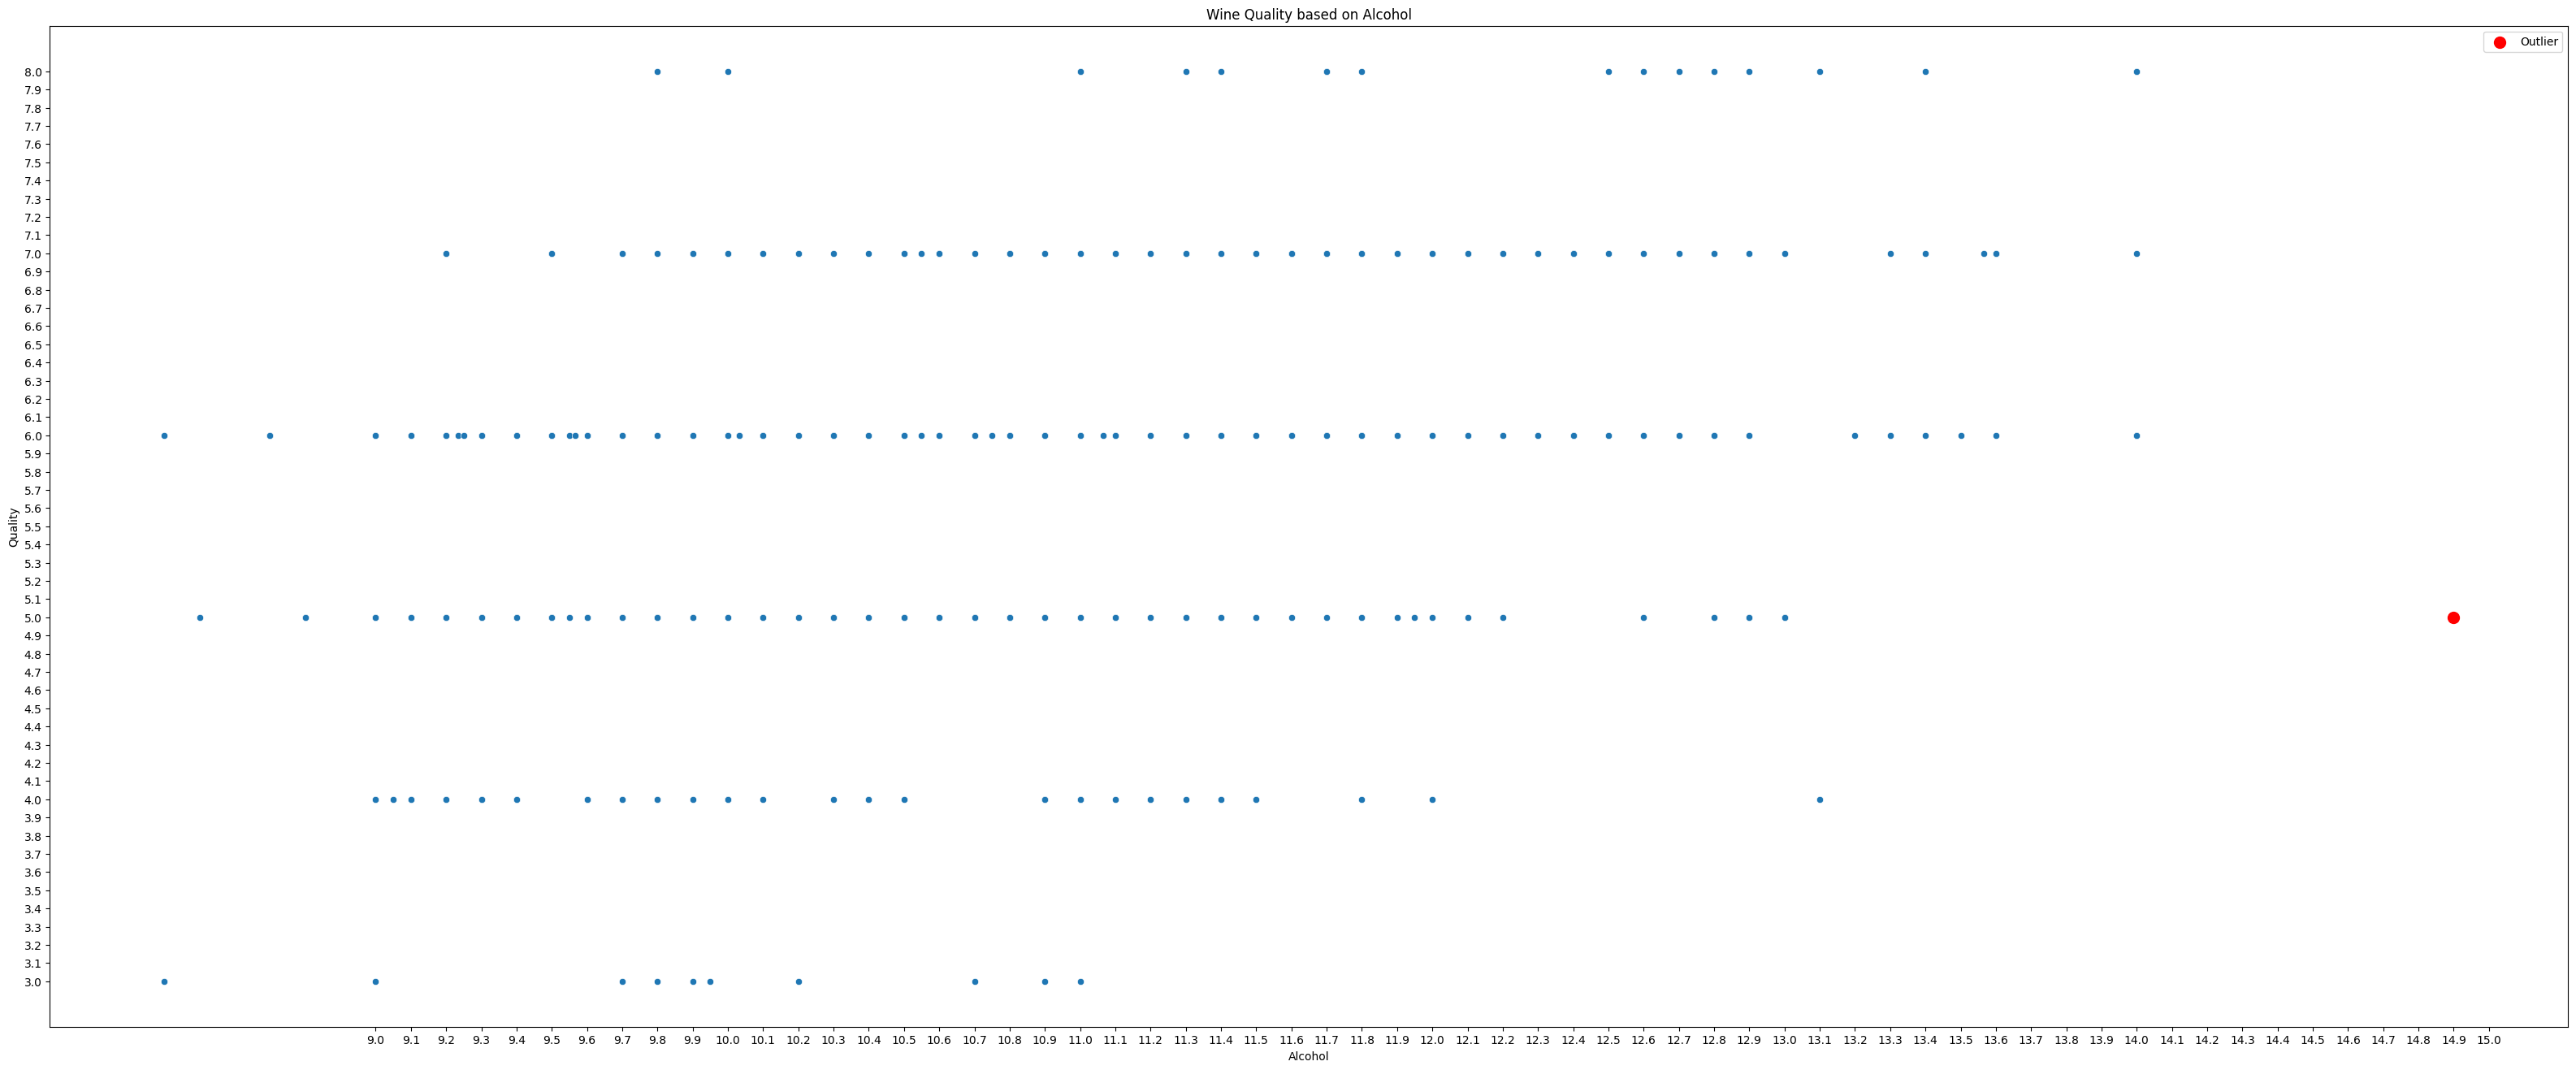

In [32]:
plt.figure(figsize=(40,16))
sns.scatterplot(x='alcohol', y='quality', data=df)

plt.xticks(ticks=[round(x*0.1, 1) for x in range(90, 151, 1)])

# Set y-axis ticks to include intermediate values (e.g., 3.0, 3.1, 3.2, ..., 8.0)
plt.yticks(ticks=[round(y*0.1, 1) for y in range(30, 81, 1)])

# Highlight the outlier
plt.scatter(x=outlier['alcohol'], y=outlier['quality'], color='red', s=100, label='Outlier')

# Adding titles and labels
plt.title('Wine Quality based on Alcohol')
plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.legend()

# Displaying the plot
plt.show()